In [1]:
import torch
import numpy as np
import cv2
import tensorflow as tf
from modelos.keypoint import KeypointDetectorModel
from translation.homography import visualize, _points_from_mask, denormalize
from translation.translation import get_players, draw_template
from visualize.visualize import get_image, get_template
from matplotlib import pyplot as plt

C:\Users\itzca\.pyenv\pyenv-win\versions\3.7.9\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [2]:
def load_keypoint():
    kp_model = KeypointDetectorModel(backbone='efficientnetb3', num_classes=29, input_shape=(1024, 1024),)
    WEIGHTS_PATH = ("models/keypoint_detector.h5")
    WEIGHTS_NAME = "keypoint_detector.h5"
    WEIGHTS_TOTAR = False
    checkpoints = tf.keras.utils.get_file(WEIGHTS_NAME, WEIGHTS_PATH, WEIGHTS_TOTAR,)
    kp_model.load_weights(checkpoints)
    return kp_model

In [3]:
def get_matrix(kp_model, imagen):
    pr_mask = kp_model(imagen)
    visualize(image=denormalize(imagen.squeeze()),pr_mask=pr_mask[..., -1].squeeze(),)
    src,dst = _points_from_mask(pr_mask[0])
    M, _ = cv2.findHomography(src, dst, cv2.RANSAC, 5)
    return M

def show_template(model, template, Matrix, img):
    detecciones = model(img)
    puntos, players = get_players(detecciones, img)
    temp = draw_template(cv2.resize(template, (320, 320)), puntos, Matrix)
    return temp, players

def process(kp_model, image, template):
    M = get_matrix(kp_model, image)
    template_2d, players = show_template(yolo, template, M, image)
    return template_2d

In [4]:
yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s')
kp_model = load_keypoint()

Using cache found in C:\Users\itzca/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-1 Python-3.7.9 torch-1.13.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


Succesfully loaded weights from C:\Users\itzca\.keras\datasets\keypoint_detector.h5


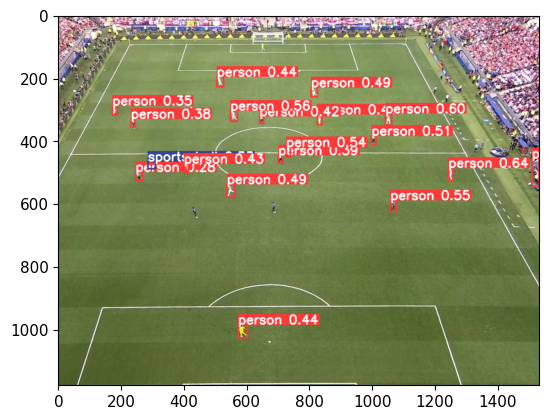

In [11]:
image = cv2.imread('media/cap1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detecciones = yolo(image)
plt.imshow(np.squeeze(detecciones.render()))
plt.show()

In [5]:
%matplotlib inline
template = get_template()
image = get_image('media/test_image.jpg')
#image = get_image('media/cap.png')

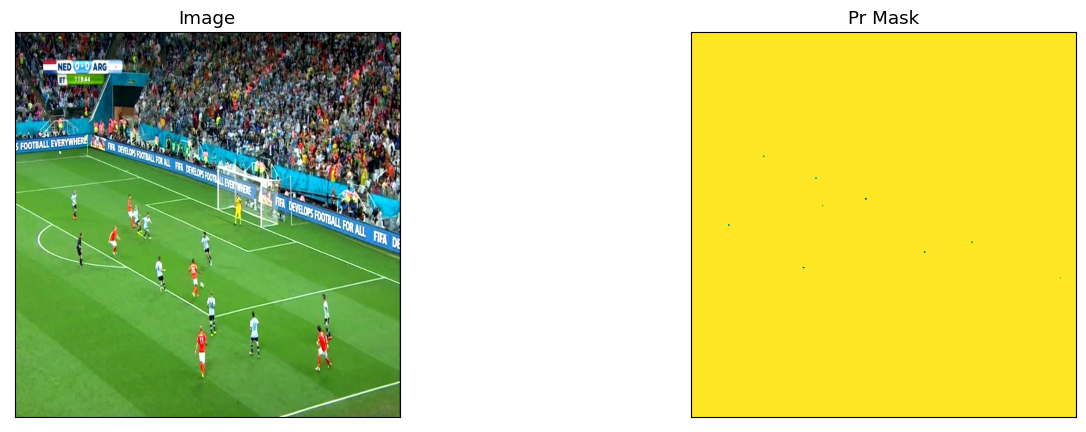

(158, 206, 218)
(190, 114, 81)
(183, 182, 71)
(116, 121, 114)
(185, 107, 77)
(194, 127, 85)
(149, 187, 194)
(161, 207, 211)
(167, 205, 213)
(191, 133, 94)
(148, 191, 199)
(194, 150, 117)
(161, 195, 201)
(162, 190, 184)


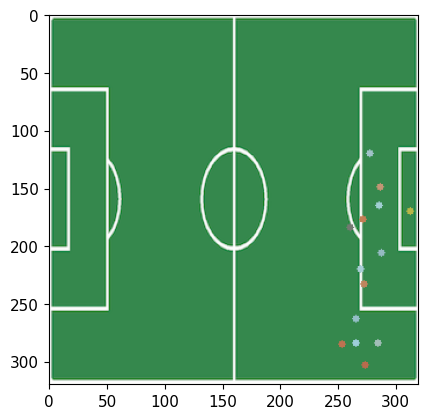

In [6]:
template_2d = process(kp_model, image, template)
plt.imshow(template_2d)
plt.show()